This script shows how to download weather data

In [6]:
import geopandas as gpd
import pygadm
import atlite
import os
import logging
import yaml
from unidecode import unidecode
logging.basicConfig(level=logging.INFO)

dirname = os.getcwd() 
dirname = os.path.join(dirname, '..') #go one folder up to main dir of tool

In [7]:
#---select study region using GADM.org-----
region_name = 'Denmark' 
country_code = 'DNK'  #3-digit ISO code  
gadm_level = 0 

weather_year = 2019
#------------------------------------------

#output directories
output_dir = os.path.join(dirname, 'data')
os.makedirs(output_dir, exist_ok=True)
output_dir_weather_data = os.path.join(output_dir, 'weather_data')
os.makedirs(output_dir_weather_data, exist_ok=True)

INFO:root:using whole country as study area


<Axes: >

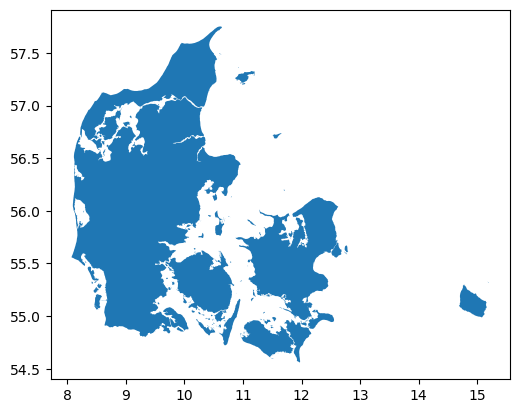

In [8]:
#get region boundary
if gadm_level==0:
    gadm_data = pygadm.Items(admin=country_code)
    region = gadm_data
    region.set_crs('epsg:4326', inplace=True) #pygadm lib extracts information from the GADM dataset as GeoPandas GeoDataFrame. GADM.org provides files in coordinate reference system is longitude/latitude and the WGS84 datum.
    logging.info('using whole country as study area')
else:
    gadm_data = pygadm.Items(admin=country_code, content_level=gadm_level)
    region = gadm_data.loc[gadm_data[f'NAME_{gadm_level}']==region_name]
    region.set_crs('epsg:4326', inplace=True) #pygadm lib extracts information from the GADM dataset as GeoPandas GeoDataFrame. GADM.org provides files in coordinate reference system is longitude/latitude and the WGS84 datum.
    logging.info('using admin area within country as study area')

#region.to_file(os.path.join('data', f'{region_name}_4326.geojson'), driver='GeoJSON', encoding='utf-8')
region.plot()

In [9]:
# put buffer around study region to make sure that all ERA5 grid cells that intersect with the region are included in the cutout
d = 0.3
bounds = region.total_bounds + [-d, -d, d, d]
print(f"Bounding box (EPSG:4326): \nminx: {bounds[0]}, miny: {bounds[1]}, maxx: {bounds[2]}, maxy: {bounds[3]}")

#cutout atlite needs x-slice (longitude) and y-slice (latitude)
x = (bounds[0], bounds[2])
y = (bounds[1], bounds[3])

Bounding box (EPSG:4326): 
minx: 7.7764, miny: 54.259, maxx: 15.492500000000001, maxy: 58.0515


# download cutout with atlite
adapt filename and year

In [ ]:
#download settings
cutout = atlite.Cutout(
    path=os.path.join(output_dir_weather_data,f"{region_name}-{weather_year}-era5.nc"), 
    module="era5", 
    x=slice(bounds[0], bounds[2]),  
    y=slice(bounds[1], bounds[3]),
    time=str(weather_year)
    #time=("2022-07-01","2023-06-30")
)

INFO:atlite.cutout:Building new cutout c:\Users\b396636\Documents\Turkiye_private\programming_turkiye\land_availability\weather_data\..\data\weather_data\Denmark-2019-era5.nc


In [11]:
# download
cutout.prepare(features=['wind'], monthly_requests=True, concurrent_requests=True, compression=None) 
#cutout.prepare(features=['influx', 'temperature'], monthly_requests=True, concurrent_requests=True, compression=None)

#progress: https://cds.climate.copernicus.eu/requests?tab=all

INFO:atlite.data:Storing temporary files in C:\Users\b396636\AppData\Local\Temp\tmp2t85el6g
INFO:atlite.data:Calculating and writing with module era5:
INFO:atlite.datasets.era5:Requesting data for feature wind...
c:\Users\b396636\AppData\Local\anaconda3\envs\atlite\Lib\site-packages\cads_api_client\legacy_api_client.py:101: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (INFO)>>}.
  warnings.warn(
2026-03-02 14:02:25,726 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeser

4f89cc7b0604914aaa47a566ceab7b58.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

2026-03-02 14:12:44,302 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2026-03-02 14:12:45,204 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-11)
	10m_v_component_of_wind (2019-11)
	100m_u_component_of_wind (2019-11)
	100m_v_component_of_wind (2019-11)
	forecast_surface_roughness (2019-11)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2026-03-02/160ea0196e44c95bdf5af15738b001d6.grib


160ea0196e44c95bdf5af15738b001d6.grib:   0%|          | 0.00/3.77M [00:00<?, ?B/s]

2026-03-02 14:16:44,716 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2026-03-02 14:16:45,532 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-1)
	10m_v_component_of_wind (2019-1)
	100m_u_component_of_wind (2019-1)
	100m_v_component_of_wind (2019-1)
	forecast_surface_roughness (2019-1)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2026-03-02/875b20ec33c02de165b041fad0a3121c.grib


875b20ec33c02de165b041fad0a3121c.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

2026-03-02 14:20:45,120 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2026-03-02 14:20:45,193 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-2)
	10m_v_component_of_wind (2019-2)
	100m_u_component_of_wind (2019-2)
	100m_v_component_of_wind (2019-2)
	forecast_surface_roughness (2019-2)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2026-03-02/c36fcd4f1b1a7d6ca9d568acee028c83.grib


c36fcd4f1b1a7d6ca9d568acee028c83.grib:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

2026-03-02 14:26:45,762 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-5)
	10m_v_component_of_wind (2019-5)
	100m_u_component_of_wind (2019-5)
	100m_v_component_of_wind (2019-5)
	forecast_surface_roughness (2019-5)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2026-03-02/d50893f449f6aaeb3fe8161bd1a23266.grib
2026-03-02 14:26:46,030 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running


d50893f449f6aaeb3fe8161bd1a23266.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to running
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-7)
	10m_v_component_of_wind (2019-7)
	100m_u_component_of_wind (2019-7)
	100m_v_component_of_wind (2019-7)
	forecast_surface_roughness (2019-7)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2026-03-02/6a6b163e31110a727dca37567923833.grib


6a6b163e31110a727dca37567923833.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-8)
	10m_v_component_of_wind (2019-8)
	100m_u_component_of_wind (2019-8)
	100m_v_component_of_wind (2019-8)
	forecast_surface_roughness (2019-8)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2026-03-02/761a34082d1a559c7300d43010a01cbd.grib


761a34082d1a559c7300d43010a01cbd.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

2026-03-02 14:32:46,713 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
INFO:cads_api_client.processing:status has been updated to successful
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-12)
	10m_v_component_of_wind (2019-12)
	100m_u_component_of_wind (2019-12)
	100m_v_component_of_wind (2019-12)
	forecast_surface_roughness (2019-12)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2026-03-02/67dd5a167c64b63de0148de8887192a1.grib


67dd5a167c64b63de0148de8887192a1.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to successful
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-10)
	10m_v_component_of_wind (2019-10)
	100m_u_component_of_wind (2019-10)
	100m_v_component_of_wind (2019-10)
	forecast_surface_roughness (2019-10)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2026-03-02/e9c7e9825d6a8d2d6b39c7dcfcb9e446.grib


e9c7e9825d6a8d2d6b39c7dcfcb9e446.grib:   0%|          | 0.00/3.90M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to successful
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-6)
	10m_v_component_of_wind (2019-6)
	100m_u_component_of_wind (2019-6)
	100m_v_component_of_wind (2019-6)
	forecast_surface_roughness (2019-6)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2026-03-02/416ccdb4de7ba316357b62054b54f8ba.grib


416ccdb4de7ba316357b62054b54f8ba.grib:   0%|          | 0.00/3.77M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-4)
	10m_v_component_of_wind (2019-4)
	100m_u_component_of_wind (2019-4)
	100m_v_component_of_wind (2019-4)
	forecast_surface_roughness (2019-4)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2026-03-02/56b1dfdbf9c9d6fec413d1163d96aa2e.grib


56b1dfdbf9c9d6fec413d1163d96aa2e.grib:   0%|          | 0.00/3.77M [00:00<?, ?B/s]

INFO:cads_api_client.processing:status has been updated to running
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	10m_u_component_of_wind (2019-9)
	10m_v_component_of_wind (2019-9)
	100m_u_component_of_wind (2019-9)
	100m_v_component_of_wind (2019-9)
	forecast_surface_roughness (2019-9)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2026-03-02/35c3d47090716e13c1f93c0ff49e346.grib


35c3d47090716e13c1f93c0ff49e346.grib:   0%|          | 0.00/3.77M [00:00<?, ?B/s]

<Cutout "Denmark-2019-era5">
 x = 8.00 ⟷ 15.25, dx = 0.25
 y = 54.50 ⟷ 58.00, dy = 0.25
 time = 2019-01-01 ⟷ 2019-12-31, dt = h
 module = era5
 prepared_features = ['wind']